## 1.4 Python. Matplotlib

### 1.4.1 Create simple line plot, title is 'y vs x' values range 0-10, x-label is 'x label', y-label is 'y label'

Text(0.5, 1.0, 'x vs y')

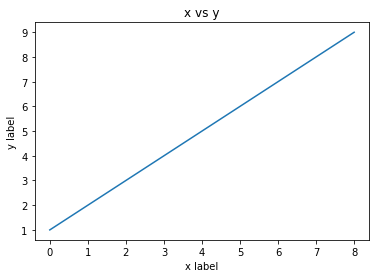

In [1]:
import matplotlib.pyplot as plt 

plt.plot(range(1, 10))
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('x vs y')

### 1.4.1 Create simple bar plot, with fruits and price

<BarContainer object of 3 artists>

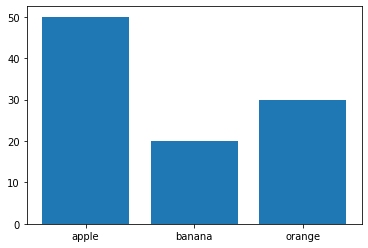

In [2]:
price = {'apple': 50, 'banana': 20, 'orange': 30}

plt.bar(price.keys(), price.values())

In [3]:
import pandas as pd
who_time_series = pd.read_csv('WHO_time_series.csv')

who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])
who_time_series.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


In [4]:
who_time_series.tail()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
31871,2020-07-31,Panama,1046,63269,25,1374
31872,2020-07-31,Timor-Leste,0,24,0,0
31873,2020-07-31,Guatemala,1221,48826,32,1867
31874,2020-07-31,Saint Vincent and the Grenadines,0,52,0,0
31875,2020-07-31,Democratic Republic of the Congo,79,9009,2,214


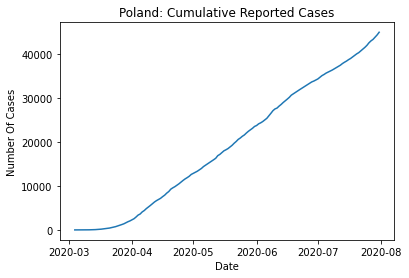

In [5]:
poland = who_time_series[who_time_series['Country'] == 'Poland']

plt.plot(poland['Date_reported'], poland['Cumulative_cases'])
plt.title('Poland: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

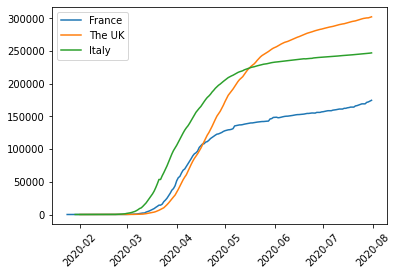

In [6]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france['Date_reported'], france['Cumulative_cases'],
         label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'],
         label='The UK')
plt.plot(italy['Date_reported'], italy['Cumulative_cases'],
         label='Italy')
plt.legend()
plt.xticks(rotation=45)
plt.show()

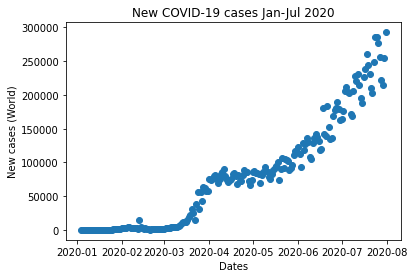

In [7]:
new_cases_by_days = who_time_series[['Date_reported', 'New_cases']].groupby('Date_reported', as_index=False).sum()

plt.scatter(new_cases_by_days['Date_reported'], new_cases_by_days['New_cases'])
plt.xlabel('Dates')
plt.ylabel('New cases (World)')
plt.title('New COVID-19 cases Jan-Jul 2020')
plt.show()


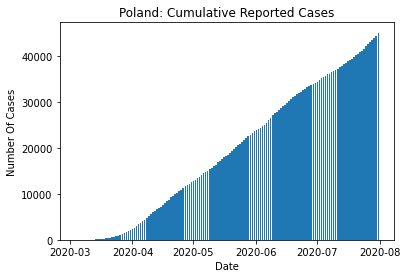

In [8]:
plt.bar(poland['Date_reported'], poland['Cumulative_cases'])
plt.title('Poland: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

[]

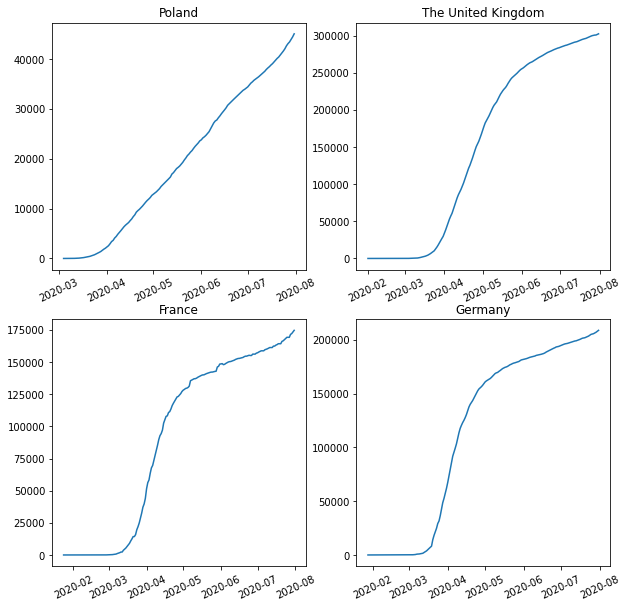

In [9]:
countries = ['Poland', 'The United Kingdom', 'France', 'Germany']

plt.figure(figsize=(10, 10))
counter = 1
for country in countries:
    country_data = who_time_series[who_time_series['Country'] == country]
    plt.subplot(2, 2, counter)
    plt.plot(country_data['Date_reported'], country_data['Cumulative_cases'])
    plt.xticks(rotation=25)
    plt.title(country)
    counter += 1

plt.plot()

## 1.5 Python. Seaborn 

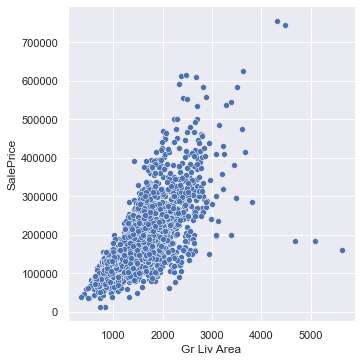

In [10]:
import seaborn as sns 
housing = pd.read_csv('housing.csv')

sns.set_theme() # all subsequent graphs will inherit the Seaborn style
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

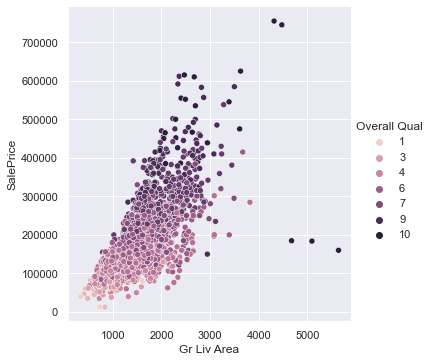

In [11]:
# we can use hue parameter to add the Overall Qual variable on the scatter plot. 
# Recall that Overall Qual describes the quality ratings of the overall material and finish of the house.


sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual')
plt.show()

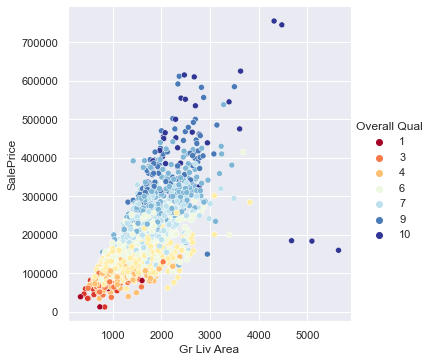

In [12]:
# we can specify the gradient using palette:

sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlBu')
plt.show()

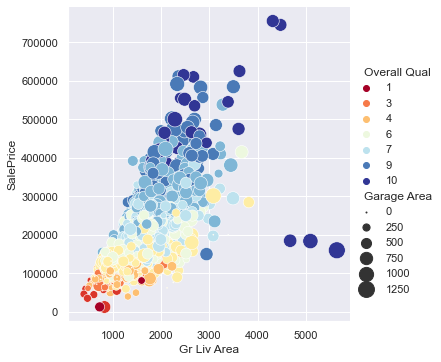

In [13]:
# we can shange dots size to add 1 more paramether.
# To make the size differences more visible, we'll increase the size range.


sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlBu', size='Garage Area', sizes=(1,300))
plt.show()

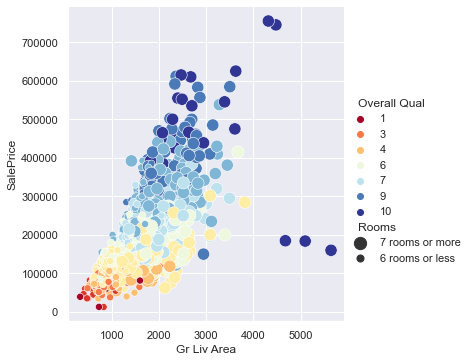

In [14]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlBu', size='Rooms', sizes=[150,50])
plt.show()

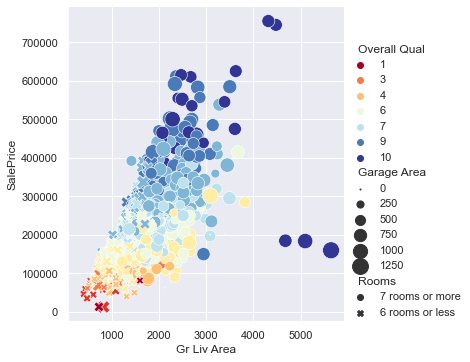

In [15]:
# we call the dots on our graphs markers. The marker can take various shapes: circle, triangle, square, etc.

sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlBu',
            size='Garage Area', sizes=(1,300),
            style='Rooms')
plt.show()

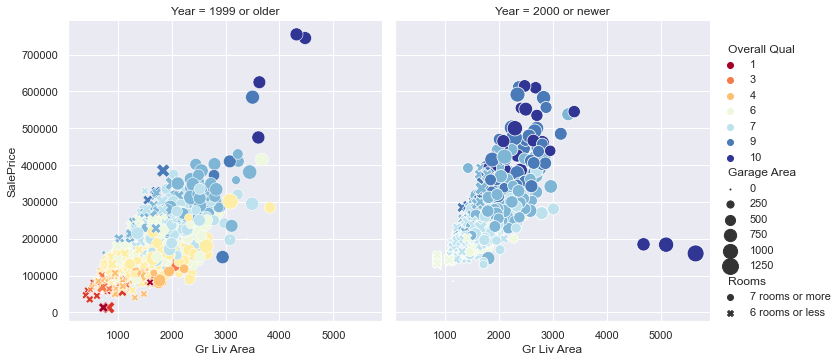

In [16]:
# We'll add one more variable by spatially separating the graph based on the values in the Year variable. 
# This variable describes the year when a house was built, and it has only two values: 1999 or older and 2000 or newer.

sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlBu',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

Tufte named the principle of maximizing data elements as maximizing the data-ink ratio. The data-ink ratio is the proportion of data-ink from the total ink. We should try to maximize the data-ink ratio within reason. Some structural elements are necessary; otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases. We'll continue this discussion on the next screen, where we'll modify our graph using Tufte's principle: maximizing the data-ink ratio.


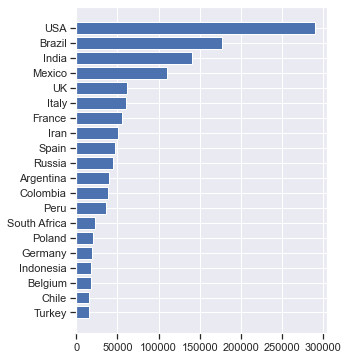

In [17]:
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')

fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
ax.tick_params(bottom=True, left=True) # delete all ticks
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(True)
plt.show()

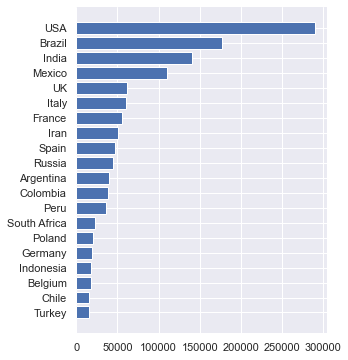

In [18]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])

ax.tick_params(bottom=False, left=False) # delete all ticks
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

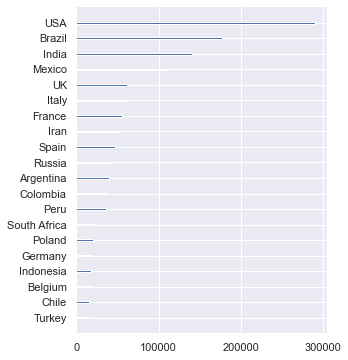

In [19]:
# To remove some of the x-tick labels, 
# we use the Axes.set_xticks method. We only keep the labels 0, 100000, 200000, and 300000.
# To make the bars less thick, we can use the height parameter inside the Axes.barh() method.

fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.1, )
ax.set_xticks([0, 100000, 200000, 300000])
ax.tick_params(bottom=False, left=False) # delete all ticks
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

We've applied two design principles:

- We chose a horizontal bar graph using the familiarity principle.
- We modified the graph using the maximizing data-ink ratio principle.

Our audience scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

One problem with our graph is that the tick labels are located at the bottom. We're going to move the tick labels at the top of the graph using the Axes.xaxis.tick_top() method and add a title.

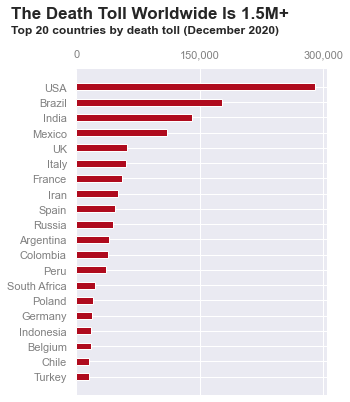

In [20]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45,
        color='#af0b1e') #also we can change color

#add title
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')

#add subtitle
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12, weight='bold')

ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])

# move the tick labels at the top
ax.xaxis.tick_top()

ax.tick_params(bottom=False, left=False, top=False, colors='grey') # add top!!!

for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

Next, we're going to left-align the y-tick labels (the country names). To do that, we're going to leverage the flexibility of the Axes.text() method. First, however, we're going to remove the current labels using the Axes.set_yticklabels() method.

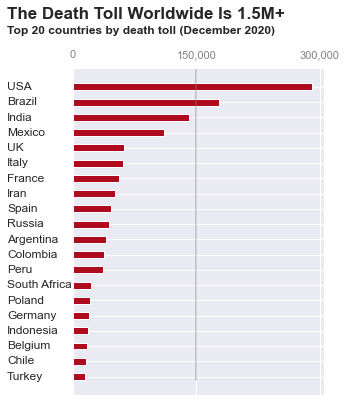

In [21]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45,
        color='#af0b1e') 
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12, weight='bold')
ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.xaxis.tick_top()


ax.set_yticklabels([]) 
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
    
    # add middle line 
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
    
ax.tick_params(bottom=False, left=False, top=False, colors='grey') # add top!!!
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

In [23]:
crash_df = sns.load_dataset('car_crashes')
crash_df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


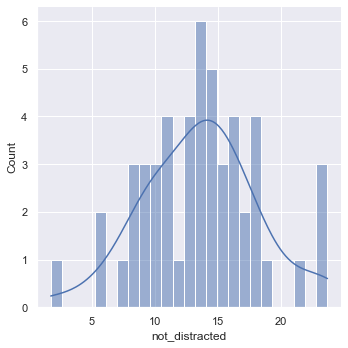

In [29]:
sns.displot(crash_df['not_distracted'], kde=True, bins=25)

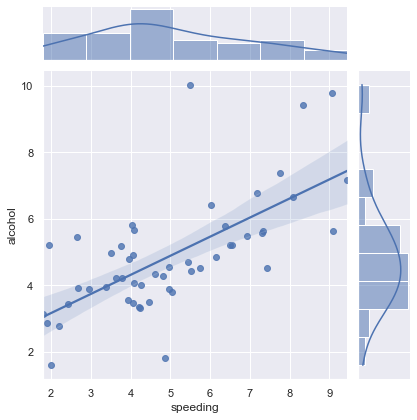

In [33]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

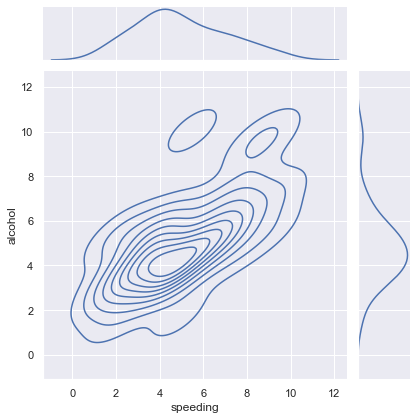

In [34]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

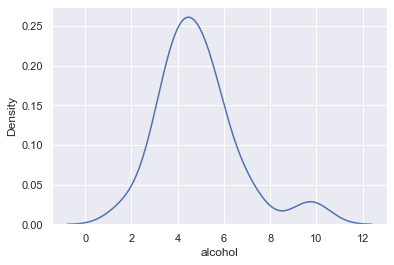

In [35]:
sns.kdeplot(crash_df['alcohol'])

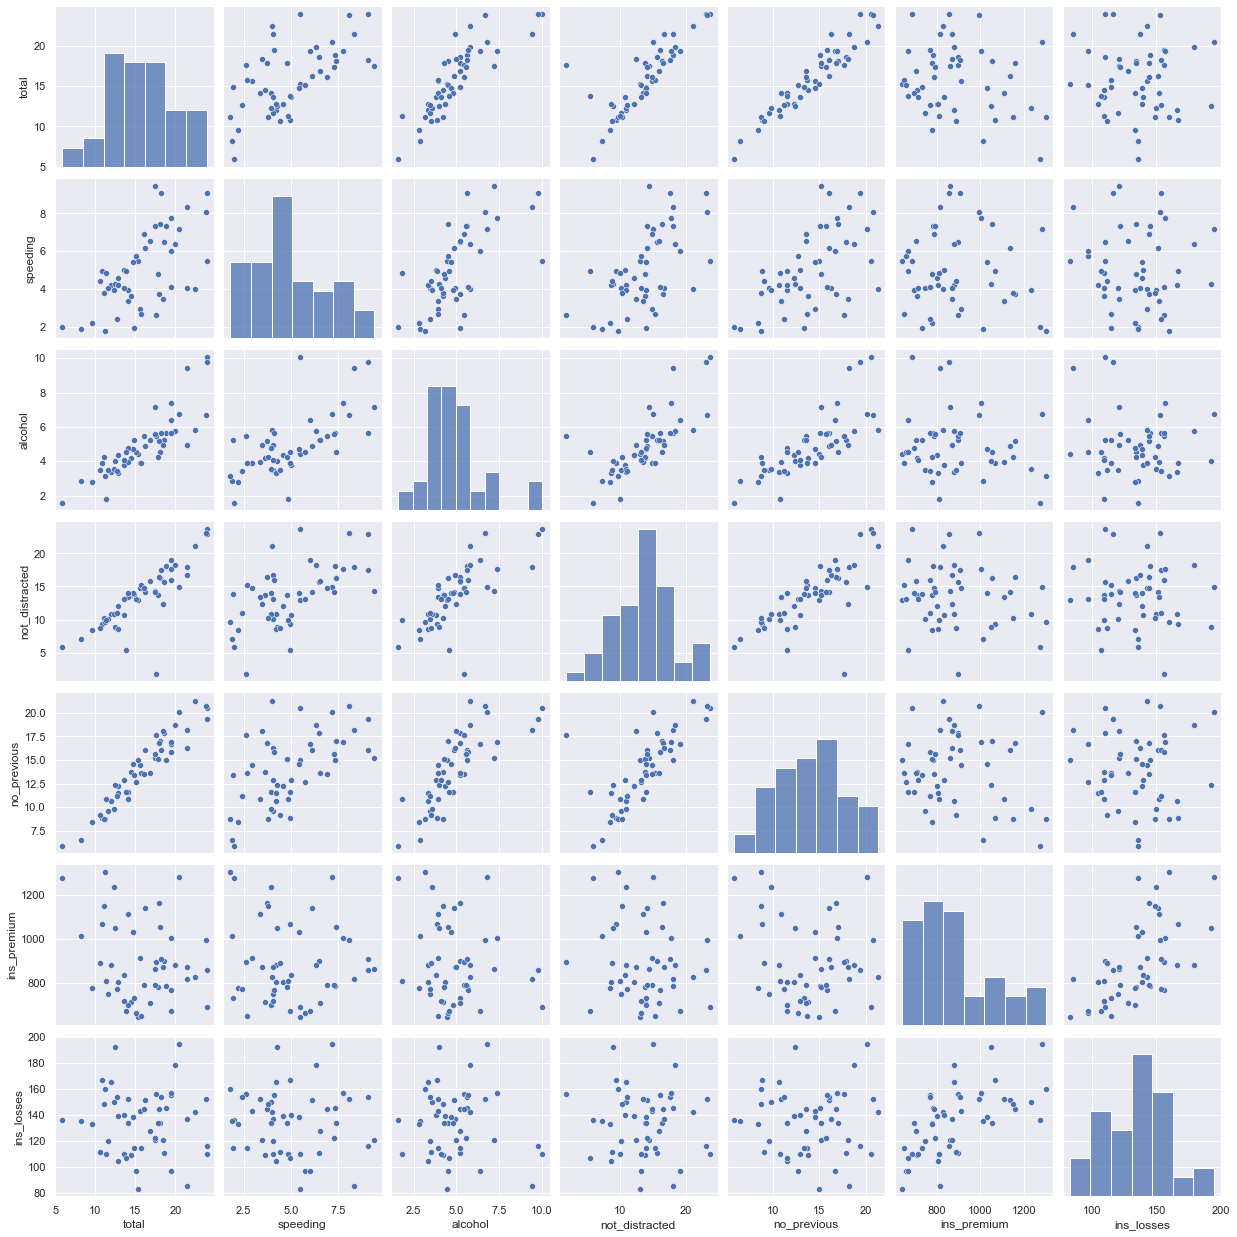

In [36]:
sns.pairplot(crash_df)

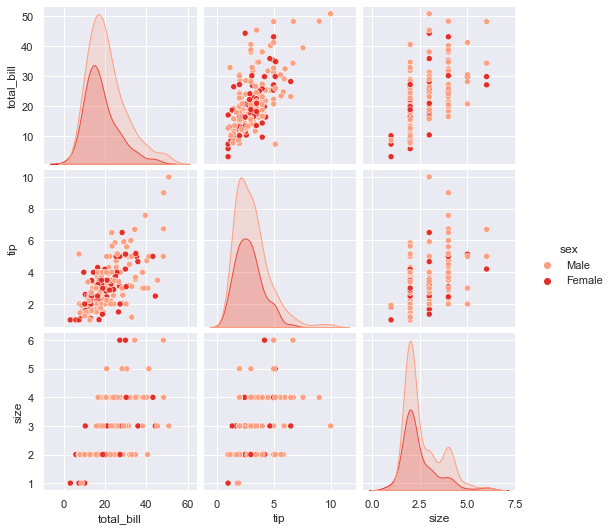

In [46]:
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette="Reds")

<AxesSubplot:xlabel='tip'>

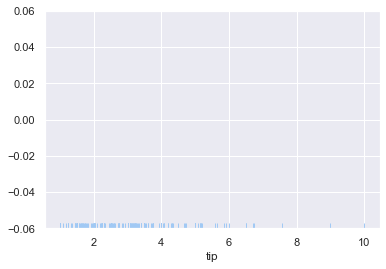

In [55]:
sns.rugplot(tips_df['tip'])

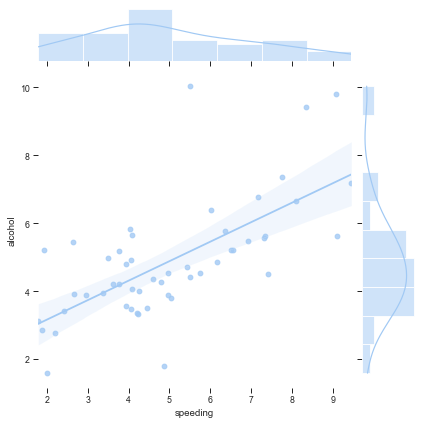

In [84]:
sns.set_style('ticks')

sns.set_context('paper')

ax = sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(top=True, left=True, bottom=True, right=True)